# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset yang digunakan adalah **Dry Bean Dataset** dari UCI ML Repository.  
Dataset ini berisi 13.611 baris data pengukuran bentuk dan tekstur kacang kering dengan 16 fitur numerik serta label varietas (7 kelas).  
Sumber: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [25]:
df = pd.read_excel("../data/raw/Dry_Bean_Dataset.xlsx")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Cek info umum
print("Ukuran data:", df.shape)
print("\nInfo dataset:")
df.info()
print("\nMissing value per kolom:")
print(df.isnull().sum())

Ukuran data: (13611, 17)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            1

In [4]:
# Statistik deskriptif
display(df.describe())

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


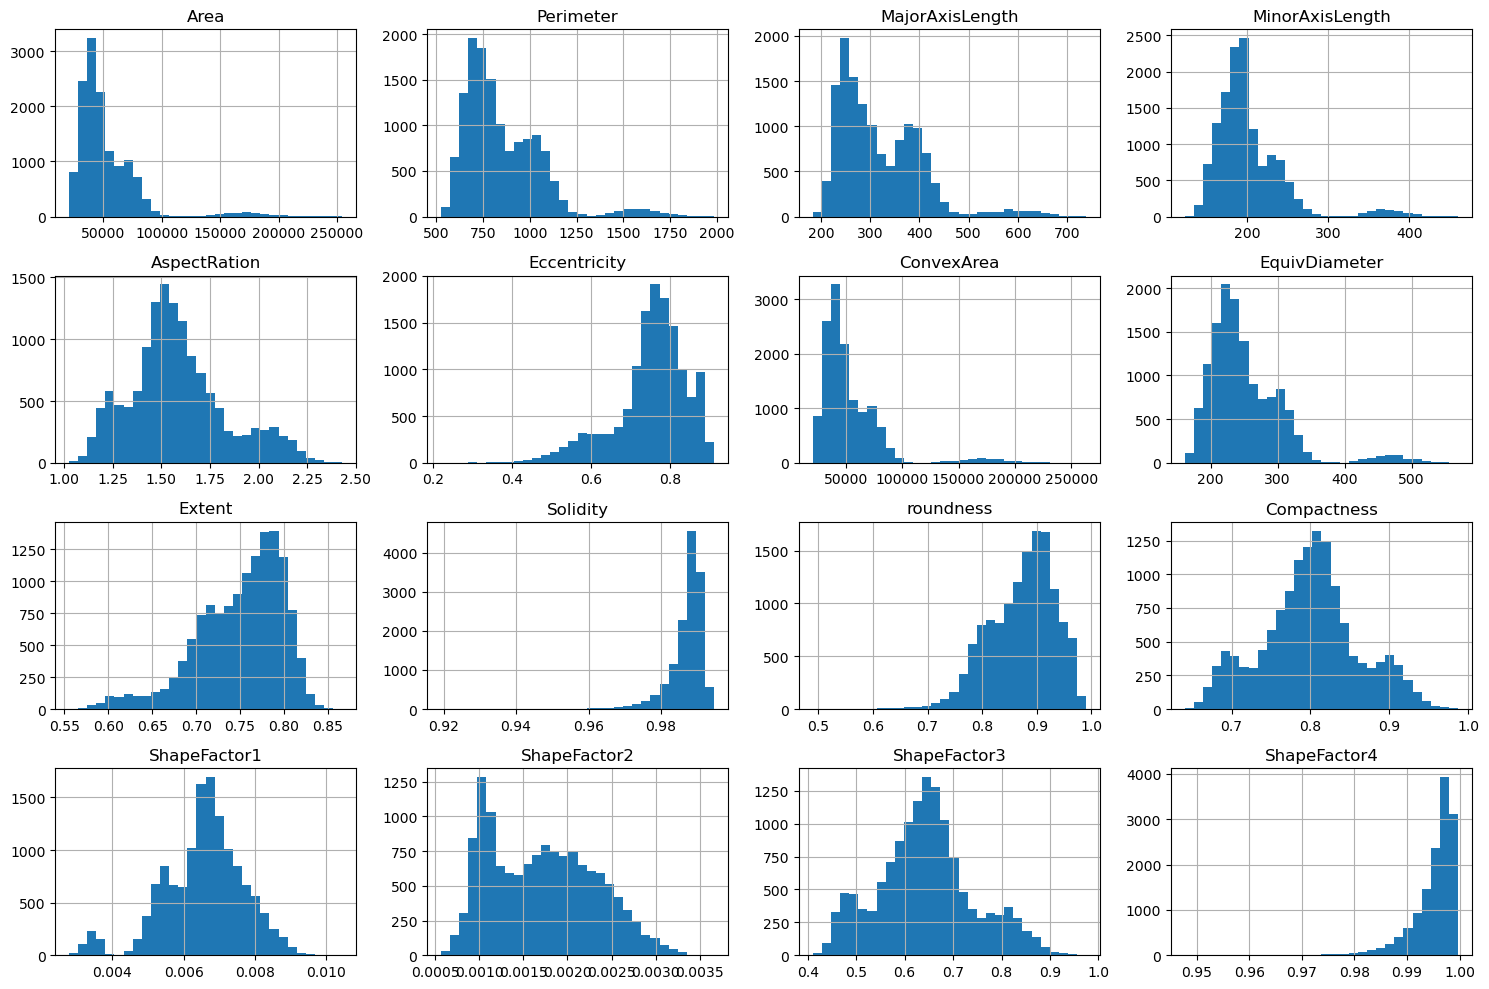

In [5]:
# Distribusi tiap fitur numerik
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

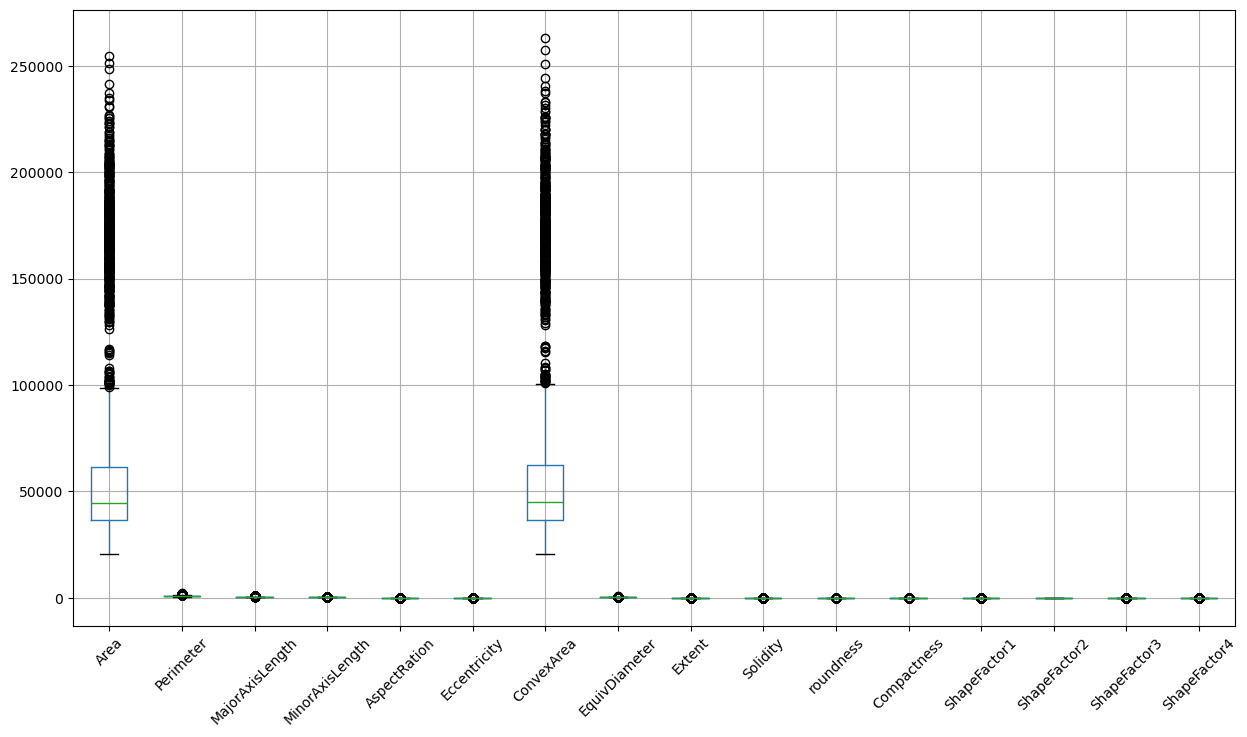

In [6]:
# Outlier dengan boxplot
num_features = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 8))
df[num_features].boxplot()
plt.xticks(rotation=45)
plt.show()

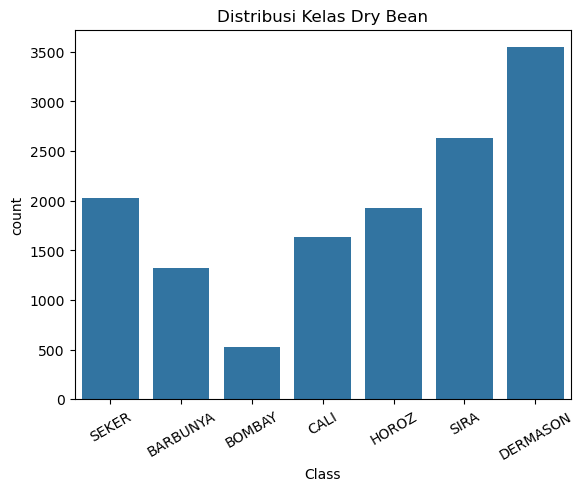

Class
DERMASON    26.052458
SIRA        19.366689
SEKER       14.892366
HOROZ       14.165014
CALI        11.975608
BARBUNYA     9.712732
BOMBAY       3.835133
Name: proportion, dtype: float64


In [7]:
# Distribusi label
sns.countplot(x="Class", data=df)
plt.title("Distribusi Kelas Dry Bean")
plt.xticks(rotation=30)
plt.show()
print(df['Class'].value_counts(normalize=True)*100)

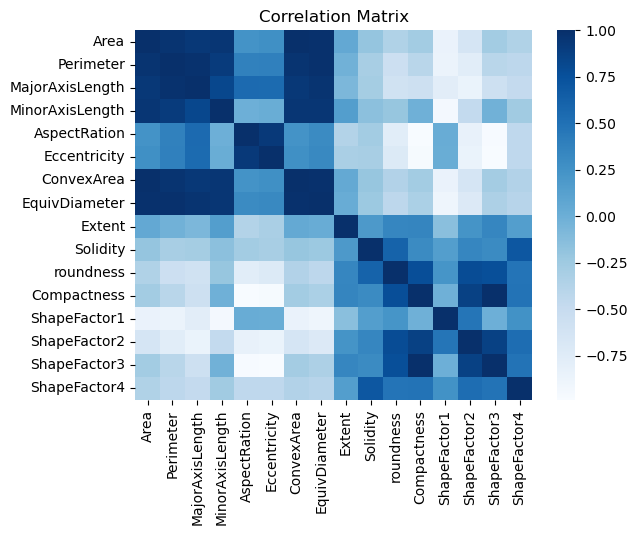

In [8]:
# Korelasi antar fitur
num_cols = [c for c in df.select_dtypes(include=np.number).columns]
sns.heatmap(df[num_cols].corr(), cmap="Blues", annot=False)
plt.title("Correlation Matrix")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# Cek duplikat
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 68


In [10]:
# Hapus duplikat
df = df.drop_duplicates()

In [12]:
# Encode label
le = LabelEncoder()
df['Class_enc'] = le.fit_transform(df['Class'])

# Pisahkan fitur dan label
X = df.drop(['Class', 'Class_enc'], axis=1)
y = df['Class_enc']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (10834, 16)
Test shape : (2709, 16)


# **6. Baseline Modelling**

Akurasi : 0.9191583610188261

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.90       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.92      0.94      0.93       326
    DERMASON       0.91      0.92      0.92       709
       HOROZ       0.96      0.95      0.95       372
       SEKER       0.95      0.95      0.95       406
        SIRA       0.87      0.86      0.86       527

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



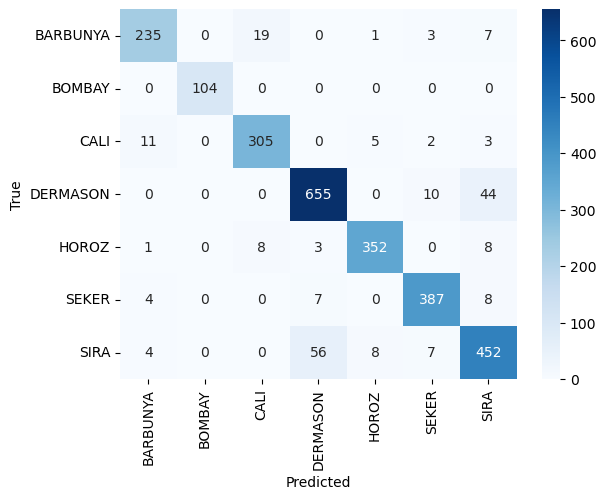

In [13]:
clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print("Akurasi :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Insight EDA & Baseline

- **Tidak ada missing value** dan **jumlah duplikat sangat sedikit**.
- Fitur numerik cenderung skewed dan memiliki beberapa outlier, terutama di fitur Area, Perimeter, ConvexArea.
- Kelas target cukup seimbang, namun ada satu-dua kelas minoritas ("BOMBAY") dan mayoritas ("DERMASON").
- Korelasi tinggi ditemukan di beberapa fitur seperti Area–ConvexArea, Perimeter–MajorAxisLength, namun belum mengganggu.
- Model Random Forest menghasilkan akurasi **92%** pada baseline tanpa tuning, sudah sangat baik sebagai permulaan.